In [1]:
import pandas as pd
base = pd.read_csv('../dataset/dataset_train_processed.csv')
# base = base.dropna()

In [2]:
base

,negotiation_date,sold_price,product,day,month,year
0,2014-01-01,0.00,NaN,1,1,2014
1,2014-01-03,0.00,NaN,3,1,2014
2,2014-01-04,0.00,NaN,4,1,2014
3,2014-01-05,0.00,NaN,5,1,2014
4,2014-01-06,0.00,NaN,6,1,2014
...,...,...,...,...,...,...
2006,2019-30-05,353.33,Polpa Cítrica,30,5,2019
2007,2019-30-06,316.67,Polpa Cítrica,30,6,2019
2008,2019-30-07,350.00,Polpa Cítrica,30,7,2019
2009,2019-31-05,331.42,Polpa Cítrica,31,5,2019


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler_price = MinMaxScaler()
base[['sold_price']] = scaler_price.fit_transform(base[['sold_price']])

In [4]:
base

,negotiation_date,sold_price,product,day,month,year
0,2014-01-01,0.000000,NaN,1,1,2014
1,2014-01-03,0.000000,NaN,3,1,2014
2,2014-01-04,0.000000,NaN,4,1,2014
3,2014-01-05,0.000000,NaN,5,1,2014
4,2014-01-06,0.000000,NaN,6,1,2014
...,...,...,...,...,...,...
2006,2019-30-05,0.418142,Polpa Cítrica,30,5,2019
2007,2019-30-06,0.374757,Polpa Cítrica,30,6,2019
2008,2019-30-07,0.414201,Polpa Cítrica,30,7,2019
2009,2019-31-05,0.392213,Polpa Cítrica,31,5,2019


In [5]:
base = base.iloc[:, 1].values

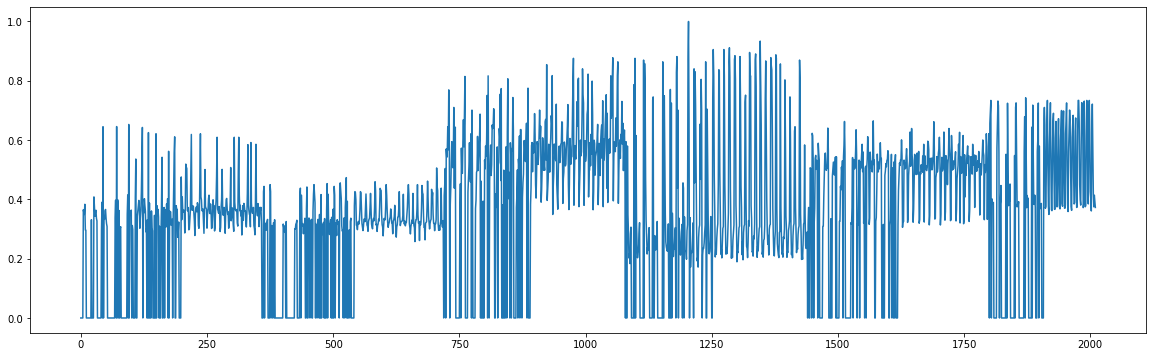

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(base)
plt.show()

In [7]:
periodos = 30 # de quantos em quantos periodos sao os dados ()
previsao_futura = 1 # saber um periodo

X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)
y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)

In [8]:
X_batches.shape, y_batches.shape, X_teste.shape, y_teste.shape

((67, 30, 1), (67, 30, 1), (1, 30, 1), (1, 30, 1))

In [9]:
import tensorflow as tf
tf.random.set_seed(42)

tf.__version__

'2.4.0'

In [10]:
entradas = 1
neuronios_oculta = 300
neuronios_saida = 1

# Usando RNN Simples

In [73]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.rnn = tf.keras.layers.SimpleRNN(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.rnn(inputs)
        x = self.dense(x)

        return x

In [74]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  0.090385067313164
101  erro:  0.01106162050297986
201  erro:  0.008933897276171122
301  erro:  0.007978227303300603
401  erro:  0.007185763294664194
501  erro:  0.006347170321779551
601  erro:  0.005634704595304645
701  erro:  0.00544640211033708
801  erro:  0.0048224129269816935
901  erro:  0.004292032387891985


In [75]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[0.2697851 ],
        [0.25590694],
        [0.24361752],
        [0.26865014],
        [0.21392596],
        [0.47678927],
        [0.41929716],
        [0.428753  ],
        [0.3153663 ],
        [0.40145582],
        [0.1515352 ],
        [0.3148117 ],
        [0.3194734 ],
        [0.25763735],
        [0.1249037 ],
        [0.3158208 ],
        [0.287049  ],
        [0.19749486],
        [0.25985408],
        [0.32944748],
        [0.29448038],
        [0.11275294],
        [0.31745604],
        [0.34253797],
        [0.14990275],
        [0.27371126],
        [0.28801173],
        [0.2399748 ],
        [0.21109587],
        [0.33879185]]], dtype=float32)>

In [76]:
import numpy as np
y_teste = scaler_price.inverse_transform(y_teste.reshape(-1, 1))
y_teste2 = np.ravel(y_teste)

In [77]:
y_teste2

array([316.88, 325.  , 340.  , 316.67, 475.  , 508.5 , 612.5 , 490.  ,
       310.94, 314.  , 325.  , 326.25, 317.31, 295.  , 305.83, 309.44,
       318.95, 310.94, 318.33, 313.24, 303.33, 306.67, 328.57, 316.67,
       321.67, 324.09, 320.  , 305.  , 350.  , 315.  ])

In [78]:
previsoes2 = scaler_price.inverse_transform(previsoes.numpy().reshape(-1, 1))
previsoes2 = np.ravel(previsoes2)

In [79]:
previsoes2

array([333.84958, 324.13486, 315.53226, 333.0551 , 294.74817, 478.7525 ,
       438.508  , 445.1271 , 365.7564 , 426.01904, 251.07463, 365.36816,
       368.63135, 325.34616, 232.4326 , 366.07455, 345.9343 , 283.2464 ,
       326.89786, 375.61325, 351.13626, 223.92706, 367.21924, 384.77658,
       249.93192, 336.5979 , 346.60822, 312.98236, 292.76712, 382.15427],
      dtype=float32)

In [80]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste2, previsoes2)
mae

52.84259940592449

In [81]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

67.35449470212754


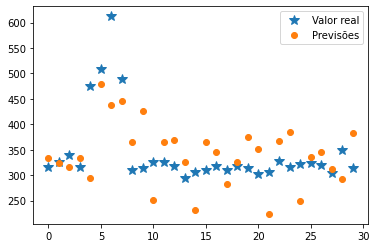

In [82]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

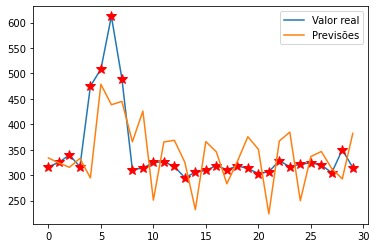

In [83]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

# Usando LSTM

In [11]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = tf.keras.layers.LSTM(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)

        return x

In [12]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  0.1933859513798325
101  erro:  0.0397423517012855
201  erro:  0.033545196486991564
301  erro:  0.0309259150161248
401  erro:  0.02886219136897383
501  erro:  0.026840012301044908
601  erro:  0.02513318833101587
701  erro:  0.02309185974788023
801  erro:  0.02279161906326143
901  erro:  0.021042163376644083


In [13]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[0.3422372 ],
        [0.40950665],
        [0.51190346],
        [0.58858556],
        [0.56033534],
        [0.52768946],
        [0.38168725],
        [0.44534197],
        [0.59529877],
        [0.36315325],
        [0.45310172],
        [0.53227615],
        [0.685494  ],
        [0.66158545],
        [0.55326533],
        [0.43970215],
        [0.49102423],
        [0.5886156 ],
        [0.4857621 ],
        [0.42649814],
        [0.44032103],
        [0.5503591 ],
        [0.6444423 ],
        [0.7101878 ],
        [0.6259772 ],
        [0.49261174],
        [0.4717879 ],
        [0.4863222 ],
        [0.4696766 ],
        [0.4710014 ]]], dtype=float32)>

In [14]:
import numpy as np
y_teste = scaler_price.inverse_transform(y_teste.reshape(-1, 1))
y_teste2 = np.ravel(y_teste)
y_teste2

array([321.67, 500.  , 613.75, 600.  , 580.  , 314.38, 324.09, 618.  ,
       372.  , 316.88, 320.  , 520.  , 620.  , 609.38, 385.  , 325.  ,
       559.  , 620.  , 527.5 , 360.  , 340.  , 305.  , 532.8 , 609.5 ,
       487.5 , 353.33, 316.67, 350.  , 331.42, 315.  ])

In [15]:
previsoes2 = scaler_price.inverse_transform(previsoes.numpy().reshape(-1, 1))
previsoes2 = np.ravel(previsoes2)
previsoes2

array([289.19043, 346.0331 , 432.55844, 497.3548 , 473.48337, 445.89758,
       322.52573, 376.31396, 503.02747, 306.8645 , 382.87097, 449.77335,
       579.24243, 559.03973, 467.50922, 371.5483 , 414.91547, 497.3802 ,
       410.46896, 360.39093, 372.07126, 465.0534 , 544.5538 , 600.1087 ,
       528.95074, 416.25693, 398.66077, 410.94226, 396.87674, 397.9962 ],
      dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste2, previsoes2)
mae

81.30077876790364

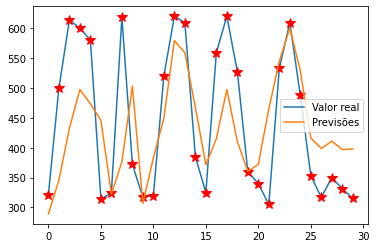

In [17]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

In [18]:
print(np.sqrt(
        np.square(
            np.subtract(y_teste2, previsoes2)).mean()))

99.69270064841558
